# Introduction to Machine Learning

## Module imports

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
%matplotlib inline
sns.set({'figure.figsize':(16,8), 'axes.titlesize':30, 'axes.labelsize':20})

## Data loading

In [3]:
!ls ../

003-EDA-demo.ipynb
KickStarter - EDA - NGUYEN Khac Bao Anh.ipynb
KickStarter - EDA - NGUYEN Khac Bao Anh.ipynb.zip
Séance-1
Séance-3
Séance-5
Sujet.md
Séance-2
Séance-4-EDA
Séance-6 Machine Learning
dataset.csv


In [6]:
FILEPATH = os.path.join("..","dataset.csv")

In [7]:
df = pd.read_csv(FILEPATH)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


We want to predict the state of a kickstarter campaign `state` is our target

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


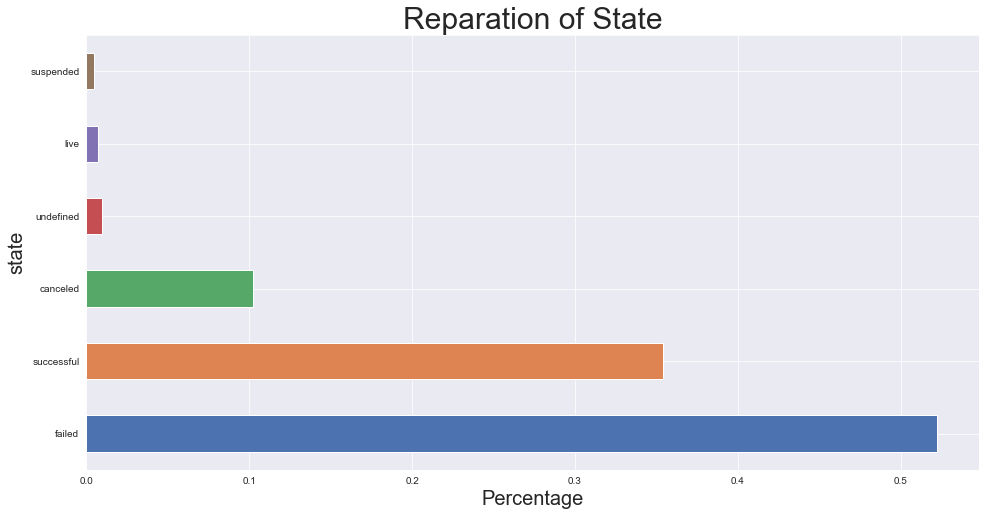

In [23]:
df['state'].value_counts(normalize=True).plot.barh()
plt.xlabel("Percentage")
plt.ylabel("state")
plt.title("Reparation of State");

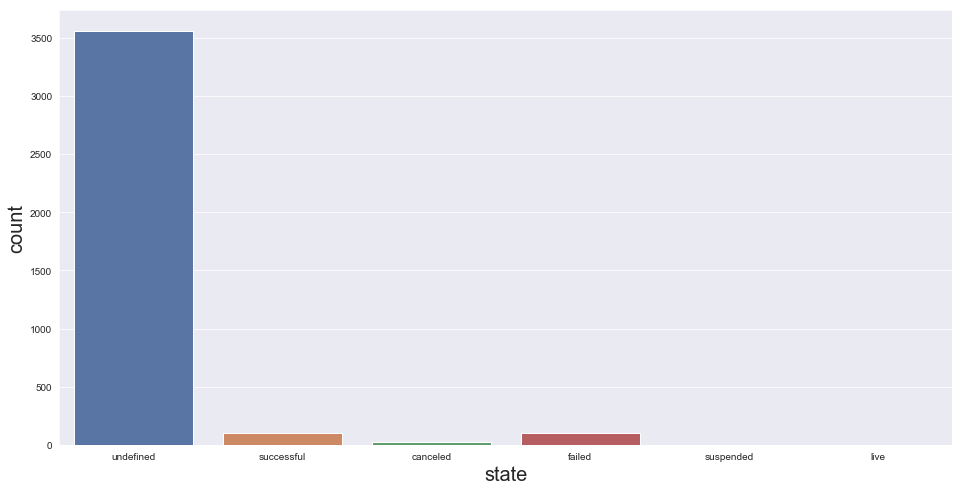

In [49]:
sns.countplot(x='state', data=df[df['country'] == 'N,0"']);

In [47]:
pd.set_option('display.max_columns',30)

In [48]:
ct = pd.crosstab(df['currency'], df['country'])
ct

country,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US
currency,,,,,,,,,,,,,,,,,,,,,,,
AUD,0,7839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,0,0,0,0,0,0
CAD,0,0,0,14756,0,0,0,0,0,0,0,0,0,0,0,0,206,0,0,0,0,0,0
CHF,0,0,0,0,761,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0
DKK,0,0,0,0,0,0,1113,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0
EUR,597,0,617,0,0,4171,0,2276,2939,0,0,811,2878,0,62,0,186,2868,0,0,0,0,0
GBP,0,0,0,0,0,0,0,0,0,33672,0,0,0,0,0,0,460,0,0,0,0,0,0
HKD,0,0,0,0,0,0,0,0,0,0,618,0,0,0,0,0,0,0,0,0,0,0,0
JPY,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0
MXN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1752,0,0,0,0,0,0,0


In [45]:
(ct > 0).sum()

country
AT       1
AU       1
BE       1
CA       1
CH       1
DE       1
DK       1
ES       1
FR       1
GB       1
HK       1
IE       1
IT       1
JP       1
LU       1
MX       1
N,0"    10
NL       1
NO       1
NZ       1
SE       1
SG       1
US       1
dtype: int64

In [46]:
(ct.T > 0).sum()

currency
AUD     2
CAD     2
CHF     2
DKK     2
EUR    10
GBP     2
HKD     1
JPY     1
MXN     1
NOK     2
NZD     2
SEK     2
SGD     1
USD     2
dtype: int64

In [54]:
mapper = ct.idxmax(axis=1).to_dict()
mapper

{'AUD': 'AU',
 'CAD': 'CA',
 'CHF': 'CH',
 'DKK': 'DK',
 'EUR': 'DE',
 'GBP': 'GB',
 'HKD': 'HK',
 'JPY': 'JP',
 'MXN': 'MX',
 'NOK': 'NO',
 'NZD': 'NZ',
 'SEK': 'SE',
 'SGD': 'SG',
 'USD': 'US'}

In [55]:
mapper['EUR'] = "EUR_UNKNOWN"
mapper

{'AUD': 'AU',
 'CAD': 'CA',
 'CHF': 'CH',
 'DKK': 'DK',
 'EUR': 'EUR_UNKNOWN',
 'GBP': 'GB',
 'HKD': 'HK',
 'JPY': 'JP',
 'MXN': 'MX',
 'NOK': 'NO',
 'NZD': 'NZ',
 'SEK': 'SE',
 'SGD': 'SG',
 'USD': 'US'}

In [57]:
for currency, country in mapper.items():
    df.loc[(df['currency']==currency) & (df['country'] == 'N,0"'),'country'] = country
    

In [58]:
df.loc[df['country']=='N,0"']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real


## Modeling with Scikit-learn

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [67]:
X = df[['usd_pledged_real','usd_goal_real']]
y = df['state']

In [68]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [71]:
rf.score(X,y)

0.9314690448712701

In [69]:
y_pred = rf.predict(X)

## Make split

In [72]:
df_train = df[:-100000]
df_test = df[-100000:]
X_train = df_train[['usd_pledged_real','usd_goal_real']]
y_train = df_train['state']
X_test = df_test[['usd_pledged_real','usd_goal_real']]
y_test = df_test['state']

In [77]:
rf_2 = RandomForestClassifier(random_state=42, max_depth=None)
rf_2.fit(X_train, y_train)

0.06572502072410569
0.15761999999999998


In [79]:
print(rf_2.score(X_train, y_train))
print(rf_2.score(X_test, y_test))

0.9342749792758943
0.84238


In [81]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)


5

In [83]:
result_train = []
result_test = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    rf_3 = RandomForestClassifier()
    rf_3.fit(X_train,y_train)
    result_train.append(rf_3.score(X_train,y_train))
    result_test.append(rf_3.score(X_test,y_test))
print(np.mean(result_train))
print(np.mean(result_test))

0.9330852660192299
0.8437546969994634
